In [1]:
from matplotlib import pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import wavfile
import numpy as np
import wave
import IPython

In [2]:
def wav_to_signal(path):
    # turn wave file content into numpy array
    mix_wave = wave.open(path, 'r')
    signal_raw = mix_wave.readframes(-1)
    signal = np.frombuffer(signal_raw, dtype=np.int16)
    return signal, mix_wave.getframerate()

In [3]:
def plot_signal(signal, sr):
    timing = np.linspace(0, len(signal) / sr, num=len(signal))
    plt.figure(figsize=(12, 2))
    plt.title('Recording')
    plt.plot(timing, signal, c="#3ABFE7")
    plt.ylim(-35000, 35000)
    plt.show()

In [4]:
def perform_ICA(X, n_components):
    ica = FastICA(n_components=n_components)
    ica_result = ica.fit_transform(X)
    return ica_result

In [5]:
def combine_signals(*signals):
    return list(zip(*signals))

In [6]:
def extract_result(zip_result):
    return [zip_result[:, i] for i in range(zip_result.shape[1])]

In [7]:
def plot_component(signal):
    plt.figure(figsize=(12,2))
    plt.title('Independent Component')
    plt.plot(signal, c="#df8efd")
    plt.ylim(-0.010, 0.010)
    plt.show()

In [20]:
# IPython.display.Audio("../AudioData/trimmedKorchVersion.wav")
import sounddevice as sd
def play_wav(filename):
    # Load the WAV file
    sample_rate, data = wavfile.read(filename)

    # Normalize the audio data
    data = data.astype(np.float32) / np.iinfo(data.dtype).max

    # Play the audio
    sd.play(data, sample_rate)
    sd.wait()
play_wav("../AudioData/monoMatt.wav")

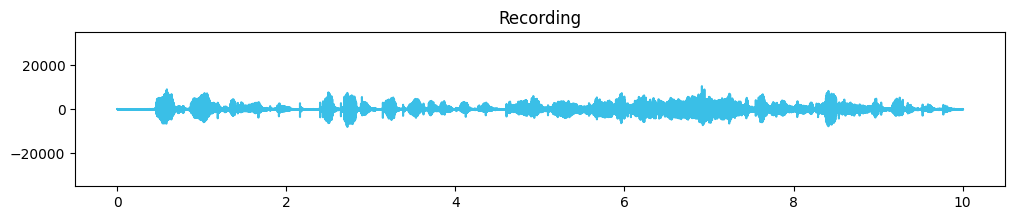

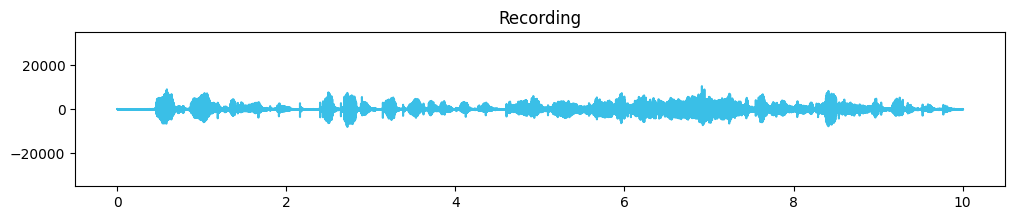

In [54]:
signal1, sr1 = wav_to_signal("../AudioData/ICA_mix1.wav")
plot_signal(signal1, sr1)
signal2, sr2 = wav_to_signal("../AudioData/ICA_mix2.wav")
plot_signal(signal2, sr2)
signal3, sr3 = wav_to_signal("../AudioData/ICA_mix3.wav")
plot_signal(signal3, sr3)

# signal1, sr1 = wav_to_signal("../AudioData/talk_music1.wav")
# plot_signal(signal1, sr1)
# signal2, sr2 = wav_to_signal("../AudioData/talk_music2.wav")
# plot_signal(signal1, sr1)



/Users/matthewprytula/UCU/year2/LinearAlgebra/AudioSourceSeparation/venv/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/matthewprytula/UCU/year2/LinearAlgebra/AudioSourceSeparation/venv/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


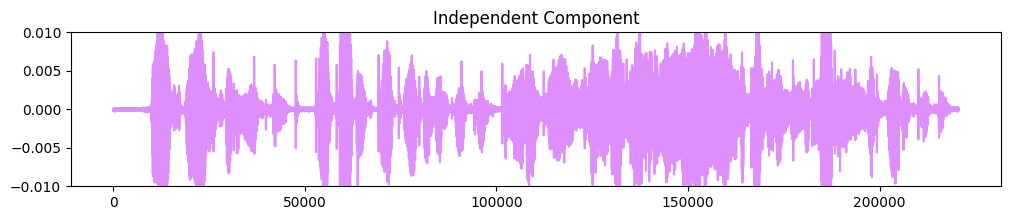

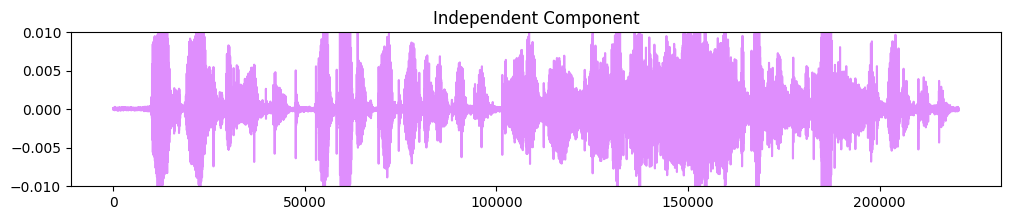

In [55]:
X = combine_signals(signal1, signal2, signal3)
result_signal = perform_ICA(X, 3)
result1, result2, result3 = extract_result(result_signal)
plot_component(result1)
plot_component(result2)
plot_component(result3)
# X = combine_signals(signal1, signal2)
# result_signal = perform_ICA(X, 2)
# result1, result2 = extract_result(result_signal)
# plot_component(result1)
# plot_component(result2)

In [56]:
def save_as_wav(signal, filename, sample_rate):
    # Scale the signal to the range of 16-bit integers
    scaled_signal = (signal * 32767).astype('int16')

    # Save the signal as a WAV file
    wavfile.write(filename, sample_rate, scaled_signal)

In [57]:
save_as_wav(result1, './results/ICA_mix1_res.wav', sr1)
save_as_wav(result2, './results/ICA_mix2_res.wav', sr2)
save_as_wav(result3, './results/ICA_mix3_res.wav', sr2)

In [50]:
play_wav('./results/ICA_mix1_res.wav')